# MLG: Lab 5 (Part 2)

Throughout the laboratory, questions that you should try to answer are highlighted as follow :

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: This is a bonus question. Answer it for your own comprehension. </p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: This is a question</p>

You will need [these files](Lab5_Part2.zip) in order to succeed.

## Report

This laboratory is the second one of a serie on Kohonen Maps.
The instructions are located in the first one.

## Exercise 4: Images

### Dataset information

The Wang image database is a database of images grouped by class. In this dataset, we downloaded only the 1000 images. You can download them on this website: http://wang.ist.psu.edu/docs/home.shtml more precisely at this address: http://wang.ist.psu.edu/~jwang/test1.tar

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- etc...

All the images in this dataset are 250x166 pixels or 166x250 pixels.

In [1]:
import numpy as np
import matplotlib.pylab as pl
import KohonenUtils
import WangImageUtilities
%matplotlib inline

In [14]:
extractor = WangImageUtilities.ImageFeatureExtractor('Wang_Data')
# Here we load images from 300-399 and from 500-599
extractor.load_images(list_indices=list(np.arange(300, 400)) + list(np.arange(500, 600)))

200 images loaded!


### Dataset Visualization

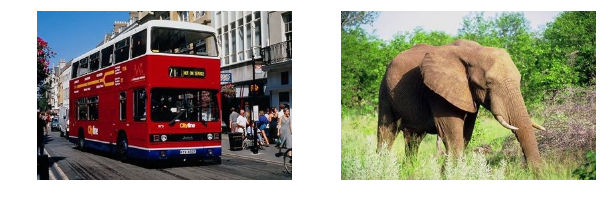

In [15]:
pl.figure(figsize=(10, 20))
pl.subplot(121)
pl.imshow(extractor.images[2])
pl.axis('off')
pl.subplot(122)
pl.imshow(extractor.images[101])
_ = pl.axis('off')

### Clustering with SOM

In [32]:
method = 2
if method == 1:
    histograms = extractor.extract_histogram()
elif method == 2:
    histograms = extractor.extract_hue_histogram()
elif method == 3:
    histograms = extractor.extract_color_histogram()
else:
    print 'Implement your own method for extracting features if you like!'

In [33]:
kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

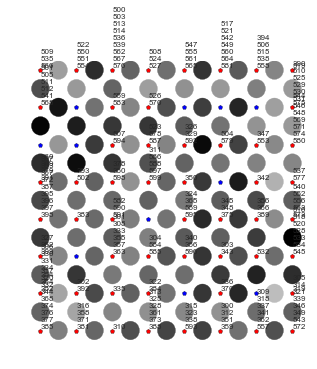

In [34]:
kmap.plot_umatrix(plot_empty=True, plot_names=True)

To simplify analysis, we can write the images to HTML. This is easier to see and analyze.

In [35]:
# Writes a 'som.html' file
# You can visualize the results and click on a neuron to see other images assigned to this neuron
extractor.to_html('som.html', kmap)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Try with several (minimum 3) different sets of images (always 100 images per class and at least two classes). You can change the size of the Self-Organizing Map as well as its parameters. Note that we provided three methods for extracting features: for at least one of the test you do try with all three methods and compare the results. </p>


This is our tries:
- [Dino VS Horse method 1](1DinoVSHorse.html)
- [Beach VS Mountain method 1](1PlageVSMountain.html)
- [Elephant VS Car method 1](1ElephantVSCar.html)


And the results for samples elephants and cars for each methode:
- [Elephant VS Car method 1](1ElephantVSCar.html)
- [Elephant VS Car method 2](2ElephantVSCar.html)
- [Elephant VS Car method 3](3ElephantVSCar.html)

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Explain the three different methods we provided for extracting features. What do you understand about them (input, output), how do they work ?</p>

- Method 1 : 
    - Extract grey intensity histogram, Change the color image on black/white image and test the percentage of grey in image
- Method 2
    - Extract hue histogram, dominating wave length, shades, color tone
- Method 3
    - Extract color intensity histogram, Test the average of colors in images



<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Include one or two results (U-Matrix (with distances) and U-Matrix (with images - print screen of html)) that you find interesting. Explain why you find it interesting (what are the input images, with which features you trained your Self-Organizing Map, with which parameters, and how it is reflected in the results)...</p>

For the trie Elephant VS Car with the method 1 we can see the separation isn't good
- With the first method the shades of grey are almost the same between Elephant and Car. So the result with this method isn't good. The darker dot in the matrix don't make a proper and visible separation between classes.
[Elephant VS Car method 1](1ElephantVSCar.png)

For the same sample but with the methode 3 we have good results
- With the 3th method analysing color,  it is easier to see, in the matrix, the separation of classes if we follow the darker dots.
[Elephant VS Car method 3](3ElephantVSCar.png)